# **Sentiment Analysis for IMDB dataset**


## **Loading dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/data/Sentiment/data

/content/drive/MyDrive/data/Sentiment/data


In [ ]:
pip install mglearn

     |████████████████████████████████| 542kB 8.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=1f01b3ada8127355f3c4e15bfc93e370f028c08054eb6f822b2a47a45668052a
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import pandas as pd
import numpy as np
import mglearn

In [ ]:
'''
from sklearn.datasets import load_files
reviews_train = load_files("test/")
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))
'''
'''

df=pd.read_csv('IMDB Dataset.csv')
df.head()
data=df['review']
target=df['sentiment']

datap=[]
datan=[]
resp=[]
resn=[]
for d,t in zip(data,target):
  if t.lower()=="positive":

    resp.append(1)
    datap.append(d)
  else:
    resn.append(0)
    datan.append(d)

finald=datap[0:1000]+datan[0:1000]
finalres=resp[0:1000]+resn[0:1000]
dataf=pd.DataFrame({"review":finald,"sentiment":finalres})
dataf.head()
dataf.to_csv("MIN_DATASET_IMDB.csv",index=False)
'''

'\nfrom sklearn.datasets import load_files\nreviews_train = load_files("test/")\n# load_files returns a bunch, containing training texts and training labels\ntext_train, y_train = reviews_train.data, reviews_train.target\nprint("type of text_train: {}".format(type(text_train)))\nprint("length of text_train: {}".format(len(text_train)))\nprint("text_train[1]:\n{}".format(text_train[1]))\n'

In [ ]:
df=pd.read_csv('MIN_DATASET_IMDB.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,"Petter Mattei's ""Love in the Time of Money"" is...",1
4,"Probably my all-time favorite movie, a story o...",1


In [ ]:
data=df['review']
target=df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
text_train,text_test,y_train,y_test=train_test_split(data,target,stratify=target,shuffle=True,random_state=144,test_size=0.2)

In [ ]:

print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
text_train.iloc[1]


type of text_train: <class 'pandas.core.series.Series'>
length of text_train: 1600


"I watch this movie without big expectations, I think everyone should do. It's a great Tv-serie and of course we couldn't compare it with Gone With the wind, but it's still nice to watch. It's also weird to see a different Scarlett. Joanne Whalley don't play Scarlett with passion and fire like Vivien Leigh, but I believe that Scarlett is changed when she became older. Don't expect to much of this just watch but don't watch like: I think this would be horrible."

In [ ]:
text_train=list(text_train)
text_test=list(text_test)
y_train=list(y_train)
y_test=list(y_test)

In [ ]:
text_train = [doc.replace("<br />", " ") for doc in text_train]

In [ ]:
print("Samples per class (training): {}".format(np.bincount(y_train)))


Samples per class (training): [800 800]


In [ ]:

print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace("<br />", " ") for doc in text_test]

Number of documents in test data: 400
Samples per class (test): [200 200]


## **Bag-of-Words for Movie Reviews**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<1600x22439 sparse matrix of type '<class 'numpy.int64'>'
	with 214554 stored elements in Compressed Sparse Row format>


In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 22439
First 20 features:
['00', '000', '007', '00am', '01pm', '02', '06', '07', '10', '100', '1000', '100th', '101', '102', '103', '105', '11', '1100ad', '116', '117']
Features 20010 to 20030:
['test', 'testament', 'testators', 'tested', 'testifies', 'testimony', 'testing', 'tests', 'tethered', 'tetsuya', 'texas', 'text', 'textbook', 'textbooks', 'textile', 'texture', 'textured', 'textures', 'th', 'thackeray']
Every 2000th feature:
['00', 'behave', 'colored', 'domination', 'freaked', 'implementing', 'lumet', 'operation', 'rapturous', 'shown', 'terrorising', 'williamsburg']


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))


Mean cross-validation accuracy: 0.83


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.83
Best parameters:  {'C': 0.1}


In [ ]:
X_test = vect.transform(text_test)
print("{:.2f}".format(grid.score(X_test, y_test)))

0.80


In [ ]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <1600x5068 sparse matrix of type '<class 'numpy.int64'>'
	with 187154 stored elements in Compressed Sparse Row format>


In [ ]:
feature_names = vect.get_feature_names()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['000', '10', '100', '11', '12', '13', '13th', '14', '15', '16', '17', '18', '19', '1930s', '1936', '1939', '1940', '1940s', '1950s', '1955', '1960', '1964', '1968', '1970', '1972', '1980', '1980s', '1981', '1983', '1987', '1994', '1995', '1999', '19th', '1st', '20', '2000', '2002', '2003', '2005', '2006', '20th', '21st', '22', '23', '24', '25', '250', '2nd', '30']
Features 20010 to 20030:
[]
Every 700th feature:
['000', 'carrey', 'dutch', 'heck', 'meant', 'pulled', 'sports', 'water']


In [ ]:
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.83


## **Removing Stopwords**

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['meanwhile', 'perhaps', 'hence', 'without', 'get', 'four', 'via', 'whether', 'across', 'you', 'afterwards', 'its', 'too', 'even', 'found', 'part', 'noone', 'other', 'nowhere', 'twelve', 'please', 'have', 'whereby', 'system', 'for', 'all', 'whereas', 'not', 'someone', 'herself', 'him', 'mine']


In [ ]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<1600x4785 sparse matrix of type '<class 'numpy.int64'>'
	with 110956 stored elements in Compressed Sparse Row format>


In [ ]:
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.84


## **Rescaling the Data with tf–idf**

In [ ]:
 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
 LogisticRegression(max_iter=1000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.85


In [ ]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())
print("Features with lowest tfidf:\n{}".format(
 feature_names[sorted_by_tfidf[:20]]))
print("Features with highest tfidf: \n{}".format(
 feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['directed' 'surprised' 'eye' 'leads' 'among' 'somewhat' 'minute'
 'setting' 'tale' 'move' 'alive' 'imagine' 'neither' 'considered' 'leaves'
 'familiar' 'suddenly' 'confused' 'failed' 'sitting']
Features with highest tfidf: 
['new' 'charlie' 'cannibal' 'freddy' 'war' 'baseball' 'ha' 'julia'
 'massacre' 'fulci' 'his' 'drugs' 'rock' 'drug' 'world' 'superman' 'the'
 'ali' 'amanda' 'jimmy']


In [ ]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
 feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'on' 'was' 'as' 'movie' 'not' 'you' 'film' 'have' 'one' 'be' 'are' 'all'
 'at' 'an' 'from' 'so' 'by' 'like' 'who' 'there' 'just' 'if' 'out' 'about'
 'or' 'they' 'his' 'he' 'has' 'what' 'some' 'can' 'good' 'more' 'very'
 'my' 'when' 'up' 'even' 'see' 'no' 'only' 'time' 'would' 'which' 'story'
 'well' 'me' 'really' 'had' 'their' 'get' 'much' 'than' 'were' 'into'
 'been' 'other' 'do' 'also' 'don' 'because' 'will' 'way' 'made' 'great'
 'first' 'most' 'her' 'make' 'how' 'people' 'after' 'bad' 'them' 'watch'
 'movies' 'then' 'too' 'any' 'think' 'could' 'we' 'she' 'seen' 'never'
 'acting' 'plot']


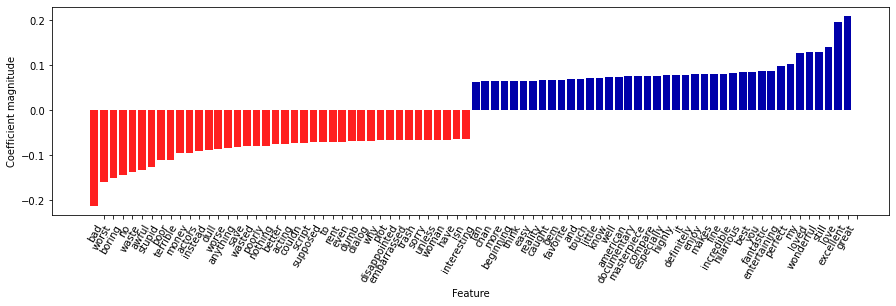

In [ ]:
mglearn.tools.visualize_coefficients(
 grid.best_estimator_.named_steps["logisticregression"].coef_,
 feature_names, n_top_features=40)

## **Bag-of-Words with More Than One Word (n-Grams)**


In [ ]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=1000))
# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
 "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.85
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 2)}


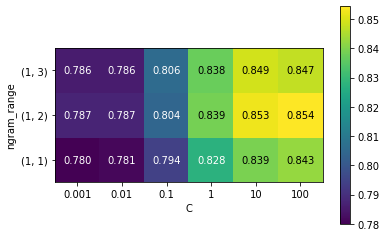

In [ ]:
import matplotlib.pyplot as plt
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
 scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
 xticklabels=param_grid['logisticregression__C'],
 yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)


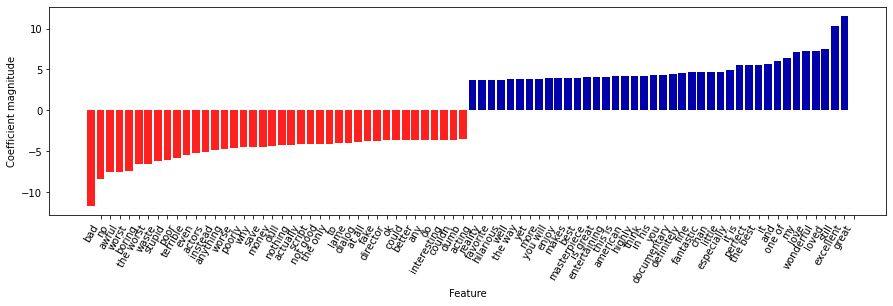

In [ ]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

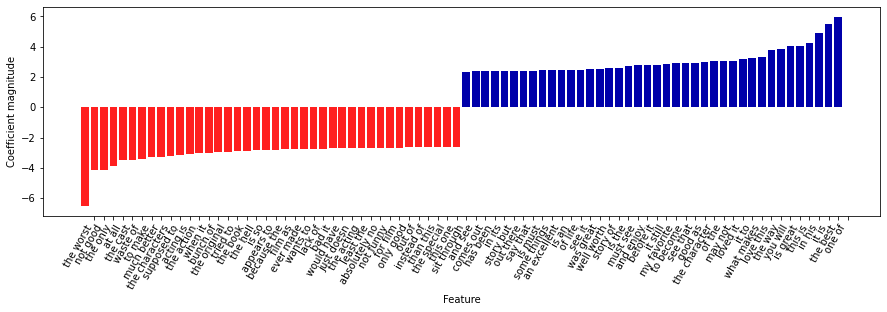

In [ ]:
# find 2-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 2

# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef[0][mask],
 feature_names[mask], n_top_features=40)


## **Advanced Tokenization, Stemming, and Lemmatization**

In [ ]:
import spacy
import nltk
# load spacy's English-language models
en_nlp = spacy.load('en')
# instantiate nltk's Porter stemmer
stemmer = nltk.stem.PorterStemmer()
# define function to compare lemmatization in spacy with stemming in nltk
def compare_normalization(doc):
 # tokenize document in spacy
 doc_spacy = en_nlp(doc)
 # print lemmas found by spacy
 print("Lemmatization:")
 print([token.lemma_ for token in doc_spacy])
 # print tokens found by Porter stemmer
 print("Stemming:")
 print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [ ]:
compare_normalization(u"Our meeting today was worse than yesterday, "
 "I'm scared of meeting the clients tomorrow.")

Lemmatization:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [ ]:
import re
# regexp used in CountVectorizer
regexp = re.compile('(?u)\\b\\w\\w+\\b')
# load spacy language model and save old tokenizer
en_nlp = spacy.load('en')
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the preceding regexp
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
 regexp.findall(string))
# create a custom tokenizer using the spacy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
 doc_spacy = en_nlp(document)
 return [token.lemma_ for token in doc_spacy]
# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)


In [ ]:
# transform text_train using CountVectorizer with lemmatization
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))
# standard CountVectorizer for reference
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

X_train_lemma.shape: (1600, 4277)
X_train.shape: (1600, 5068)


In [ ]:
# build a grid search using only 1% of the data as the training set
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(test_size=0.99,
 train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=cv)
# perform grid search with standard CountVectorizer
grid.fit(X_train, y_train)
print("Best cross-validation score "
 "(standard CountVectorizer): {:.3f}".format(grid.best_score_))
# perform grid search with lemmatization
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score "
 "(lemmatization): {:.3f}".format(grid.best_score_))


Best cross-validation score (standard CountVectorizer): 0.540
Best cross-validation score (lemmatization): 0.539
